# Midterm 2, Spring 2021: Taxi Data #

_Version 1.1_

This problem builds on your knowledge of Pandas and Numpy. It has **8** exercises, numbered 0 to **7**. There are **13 available points.** However, to earn 100%, the threshold is just **11 points.** (Therefore, once you hit **11** points, you can stop. There is no extra credit for exceeding this threshold.)

Each exercise builds logically on the previous one, but you may solve them in any order. That is, if you can't solve an exercise, you can still move on and try the next one. **However, if you see a code cell introduced by the phrase, "Sample result for ...", please run it.** Some demo cells in the notebook may depend on these precomputed results.

The point values of individual exercises are as follows:

- Exercises 0-3: 1 point (4 points total)
- Exercise 4: 3 points
- Exercise 5: 2 points
- Exercise 6: 2 points
- Exercise 7: 2 points

**Pro-tips.**
- Many or all test cells use **randomly generated inputs.** Therefore, try your best to write solutions that do not assume too much. To help you debug, when a test cell does fail, it will often tell you exactly what inputs it was using and what output it expected, compared to yours.
- If your program behavior seem strange, try resetting the kernel and rerunning everything.
- If you mess up this notebook or just want to start from scratch, save copies of all your partial responses and use `Actions` $\rightarrow$ `Reset Assignment` to get a fresh, original copy of this notebook. _(Resetting will wipe out any answers you've written so far, so be sure to stash those somewhere safe if you intend to keep or reuse them!)_
- If you generate excessive output (e.g., from an ill-placed `print` statement) that causes the notebook to load slowly or not at all, use `Actions` $\rightarrow$ `Clear Notebook Output` to get a clean copy. The clean copy will retain your code but remove any generated output. **However**, it will also **rename** the notebook to `clean.xxx.ipynb`. Since the autograder expects a notebook file with the original name, you'll need to rename the clean notebook accordingly. Be forewarned: we won't manually grade "cleaned" notebooks if you forget!

**Good luck!**

## Goal: Implement some basic analyses of NYC Taxi Cab data ##

In this problem, we'll use real New York City Yellow Taxi fare and travel data to some simple analyses, including an analysis of routes or "paths" in the data.

Once you've loaded the data, the overall workflow consists of the following steps:

1. Basic data cleaning and filtering
2. Some simple date-time processing
3. Carry out some simple descriptive analysis related of taxi fares and travel times
4. Interface the data with a graph/network analysis module, to do a simple path analysis
5. Interface the data with a geospatial mapping module, to visualize certain routes

This problem is designed to test your fluency with pandas and Numpy, as well as your ability to quickly connect what you know with new tools.

## Setup ##

Run the code cell below to load some modules that subsequent cells will need.

In [1]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###

import pandas as pd
import numpy as np
import scipy as sp

from matplotlib.pyplot import figure, subplot, plot
from matplotlib.pyplot import text, title, xlabel
from seaborn import histplot

from pprint import pprint # For pretty-printing native Python data structures
from testing_tools import load_df, load_geopandas

Matplotlib is building the font cache; this may take a moment.


Opening pickle from './resource/asnlib/publicdata/zones_dict.pickle' ...
Opening pickle from './resource/asnlib/publicdata/trips.pickle' ...
Opening pickle from './resource/asnlib/publicdata/trips_dt.pickle' ...
Opening pickle from './resource/asnlib/publicdata/filtered.pickle' ...
Opening pickle from './resource/asnlib/publicdata/trip_counts.pickle' ...
Opening pickle from './resource/asnlib/publicdata/part_of_day.pickle' ...
Opening pickle from './resource/asnlib/publicdata/csr.pickle' ...


## Part A: Taxi Zones and Paths (Exercises 0 and 1) ##

The NYC Taxi Dataset that you will analyze contains records for taxi rides or _trips._ Each trip starts in one "zone" and ends in another. The NYC Metropolitan area is divided into 266 "zones."

Run the cell below, which loads a pandas dataframe holding metadata about these zones, which are stored in the dataframe named `zones`.

In [2]:
zones = load_df('nyc-taxi-data/taxi+_zone_lookup.csv').drop('service_zone', axis=1).fillna('Unknown')
zones.head()

Reading a regular pandas dataframe from './resource/asnlib/publicdata/nyc-taxi-data/taxi+_zone_lookup.csv' ...


,LocationID,Borough,Zone
0,1,EWR,Newark Airport
1,2,Queens,Jamaica Bay
2,3,Bronx,Allerton/Pelham Gardens
3,4,Manhattan,Alphabet City
4,5,Staten Island,Arden Heights


Each zone has a unique integer ID (the `LocationID` column), a name (`Zone`), and an administrative district (`Borough`).

Note that all location IDs from 1 to `len(zones)` are represented in this dataframe. However, you should not assume that in the exercises below.

In [3]:
print("# of unique location IDs:", len(zones['LocationID'].unique()))
print("Some stats on location IDs:")
zones['LocationID'].describe()

# of unique location IDs: 265
Some stats on location IDs:


count    265.000000
mean     133.000000
std       76.643112
min        1.000000
25%       67.000000
50%      133.000000
75%      199.000000
max      265.000000
Name: LocationID, dtype: float64

### Exercise 0: `zones_to_dict` (1 point) ###

Complete the function, `zones_to_dict(zones)`, below. The input, `zones`, will be a dataframe of taxi zones like the one above, having columns `LocationID`, `Borough`, and `Zone`. Your function should return a Python dictionary where

- each key is a location ID, stored as an integer;
- and each corresponding value is a string of the form, `"{zone}, {borough}"`, that is, the zone (**stripped of any leading or trailing whitespace**) concatenated with the borough (also stripped of leading or trailing whitespace), separated by a comma plus a space.

For example, if `zones` is the following:

|    |   LocationID | Borough       | Zone                    |
|---:|-------------:|:--------------|:------------------------|
|  0 |            1 | EWR           | Newark Airport          |
|  1 |            2 | Queens        | Jamaica Bay             |
|  2 |            3 | Bronx         | Allerton/Pelham Gardens |

then the function should return

```python
{1: 'Newark Airport, EWR', 2: 'Jamaica Bay, Queens', 3: 'Allerton/Pelham Gardens, Bronx'}
```

> _Note:_ Your function must _not_ modify the input dataframe, `zones`. The test cell will check for that and may fail with an error if it detects a change.

In [4]:
def zones_to_dict(zones):
    locs = zones['LocationID']
    zbstrings = zones['Zone'].str.strip() + ', ' + zones['Borough'].str.strip()
    from random import random
    return {loc: zbs for loc, zbs in zip(locs, zbstrings)}


In [5]:
# Demo:
zones_to_dict(zones.iloc[:3]) # Sample output on the first three examples of `zones`

{1: 'Newark Airport, EWR',
 2: 'Jamaica Bay, Queens',
 3: 'Allerton/Pelham Gardens, Bronx'}

In [6]:
# Test: `mt2_ex0_zones_to_dict` (1 point)

###
### AUTOGRADER TEST - DO NOT REMOVE
###

from testing_tools import mt2_ex0__check
print("Testing...")
for trial in range(250):
    mt2_ex0__check(zones_to_dict)

zones_to_dict__passed = True
print("\n(Passed!)")

Testing...

(Passed!)


### Sample results for Exercise 0: `zones_to_dict` $\implies$ `zones_dict` ###

If you had a working solution to Exercise 0, then in principle you could use it to generate a zone-name dictionary for the full `zones` input. We have precomputed these for you; run the cell below to load this dictionary, which will be stored in the global variable, `zones_dict`.

> **Read and run this cell even if you skipped or otherwise did not complete Exercise 0.**

In [7]:
from testing_tools import mt2_zones_dict as zones_dict

print("\nExamples:")
for loc_id in range(1, 6):
    print("* Location", loc_id, "=>", zones_dict[loc_id])


Examples:
* Location 1 => Newark Airport, EWR
* Location 2 => Jamaica Bay, Queens
* Location 3 => Allerton/Pelham Gardens, Bronx
* Location 4 => Alphabet City, Manhattan
* Location 5 => Arden Heights, Staten Island


### Exercise 1: `path_to_zones` (1 point) ###

A _path_ is a sequence of zones. For example, if a taxi takes the path `p = [3, 2, 1]`, that means it starts at location 3 (`"Allerton/Pelham Gardens, Bronx"`), then visits location 2 (`"Jamaica Bay, Queens"`), and ends at location 1 (`"Newark Airport, EWR"`).

Complete the function, `path_to_zones(p, zones_dict)`, below. It takes as input two objects:

- `p`: a path, given as an iterable sequence of integer location IDs;
- `zones_dict`: a dictionary that might be produced by `zones_to_dict` (Exercise 0), mapping location IDs to string values.

It should output a Python list of zone names, in the same sequence as they appear in the path `p`. However, these zone names should be formatted to include the location ID, using the specific format, `"{loc_id}. {zone_borough_name}"`. For example,

```python
    path_to_zones([3, 2, 1], zones_dict) == ["3. Allerton/Pelham Gardens, Bronx",
                                             "2. Jamaica Bay, Queens",
                                             "1. Newark Airport, EWR"]
```

In [8]:
def path_to_zones(p, zones_dict):
    ###
    from random import random
    return [f"{i}. {zones_dict[i]}" for i in p]
    ###


In [9]:
# Demo:
path_to_zones([3, 2, 1], zones_dict)

['3. Allerton/Pelham Gardens, Bronx',
 '2. Jamaica Bay, Queens',
 '1. Newark Airport, EWR']

In [10]:
# Test: `mt2_ex1_path_to_zones` (1 point)

from testing_tools import mt2_ex1__check
print("Testing...")
for trial in range(250):
    mt2_ex1__check(path_to_zones)

zones_to_dict__passed = True
print("\n(Passed!)")

Testing...

(Passed!)


## Part B: Taxi trip data (Exercise 2) ##

The next piece of data you'll need is the taxi trip data. The data covers rides during June 2019. Run the next two cells to load these data into a dataframe named `taxi_trips_raw`.

In [11]:
!date
taxi_trips_raw_dfs = []
for month in ['06']: #, '07', '08']:
    taxi_trips_raw_dfs.append(load_df(f"nyc-taxi-data/yellow_tripdata_2019-{month}.csv",
                                      parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime']))
taxi_trips_raw = pd.concat(taxi_trips_raw_dfs)
del taxi_trips_raw_dfs # Save some memory
!date

Tue 02 Apr 2024 05:24:28 AM PDT
Reading a regular pandas dataframe from './resource/asnlib/publicdata/nyc-taxi-data/yellow_tripdata_2019-06.csv' ...
Tue 02 Apr 2024 05:24:45 AM PDT


In [12]:
print(f"The raw taxi trips data has {len(taxi_trips_raw):,} records (rows). Here's a sample:")
taxi_trips_raw.head()

The raw taxi trips data has 6,941,024 records (rows). Here's a sample:


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-06-01 00:55:13,2019-06-01 00:56:17,1,0.0,1,N,145,145,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0
1,1,2019-06-01 00:06:31,2019-06-01 00:06:52,1,0.0,1,N,262,263,2,2.5,3.0,0.5,0.00,0.0,0.3,6.30,2.5
2,1,2019-06-01 00:17:05,2019-06-01 00:36:38,1,4.4,1,N,74,7,2,17.5,0.5,0.5,0.00,0.0,0.3,18.80,0.0
3,1,2019-06-01 00:59:02,2019-06-01 00:59:12,0,0.8,1,N,145,145,2,2.5,1.0,0.5,0.00,0.0,0.3,4.30,0.0
4,1,2019-06-01 00:03:25,2019-06-01 00:15:42,1,1.7,1,N,113,148,1,9.5,3.0,0.5,2.65,0.0,0.3,15.95,2.5


Let's start by "focusing" our attention on just the columns we'll need in this problem.

### Exercise 2: `focus` (1 point) ###

Complete the function, `focus(trips_raw)`, below, so that it returns a new dataframe with only the columns listed below. In the new dataframe, each column should be renamed as indicated.

1. Pick-up location ID, `'PULocationID'`, which should be renamed to `'I'` in the new dataframe.
2. Drop-off location ID, `'DOLocationID'`, which should be renamed to `'J'`.
3. Trip distance in miles, `'trip_distance'`, which should be renamed to `'D'` (for "distance").
4. The fare amount (cost) in dollars, `'fare_amount'`, which should be renamed to `'C'` (for "cost").
5. The pick-up time, `'tpep_pickup_datetime'`, which should be renamed to `'T_start'`.
6. The drop-off time, `'tpep_dropoff_datetime'`, which should be renamed to `'T_end'`.

For instance, if the input is

|    |   VendorID | tpep_pickup_datetime   | tpep_dropoff_datetime   |   passenger_count |   trip_distance |   RatecodeID | store_and_fwd_flag   |   PULocationID |   DOLocationID |   payment_type |   fare_amount |   extra |   mta_tax |   tip_amount |   tolls_amount |   improvement_surcharge |   total_amount |   congestion_surcharge |
|---:|-----------:|:-----------------------|:------------------------|------------------:|----------------:|-------------:|:---------------------|---------------:|---------------:|---------------:|--------------:|--------:|----------:|-------------:|---------------:|------------------------:|---------------:|-----------------------:|
|  0 |          1 | 2019-06-01 00:55:13    | 2019-06-01 00:56:17     |                 1 |             0   |            1 | N                    |            145 |            145 |              2 |           3   |     0.5 |       0.5 |            0 |              0 |                     0.3 |            4.3 |                    0   |
|  1 |          1 | 2019-06-01 00:06:31    | 2019-06-01 00:06:52     |                 1 |             0   |            1 | N                    |            262 |            263 |              2 |           2.5 |     3   |       0.5 |            0 |              0 |                     0.3 |            6.3 |                    2.5 |
|  2 |          1 | 2019-06-01 00:17:05    | 2019-06-01 00:36:38     |                 1 |             4.4 |            1 | N                    |             74 |              7 |              2 |          17.5 |     0.5 |       0.5 |            0 |              0 |                     0.3 |           18.8 |                    0   |

then your function would return

|    |   I |   J |   D |    C | T_start             | T_end               |
|---:|----:|----:|----:|-----:|:--------------------|:--------------------|
|  0 | 145 | 145 | 0   |  3   | 2019-06-01 00:55:13 | 2019-06-01 00:56:17 |
|  1 | 262 | 263 | 0   |  2.5 | 2019-06-01 00:06:31 | 2019-06-01 00:06:52 |
|  2 |  74 |   7 | 4.4 | 17.5 | 2019-06-01 00:17:05 | 2019-06-01 00:36:38 |


> _Note 0:_ The test code will use randomly generated columns and values. Your function should depend _only_ the columns you need to keep. It should not depend on the order of columns or specific column names other than those in the list above. For instance, the example above contains a column named `'VendorID'`; since that is not a column we need for the output, your solution should work whether or not the input has a column named `'VendorID'`.
>
> _Note 1:_ The order of columns or rows in the returned dataframe will not matter, since the test code uses a tibble-equivalency test to check your answer against the reference solution.

In [13]:
def focus(trips_raw):
    ###
    renames = {'PULocationID': 'I',
           'DOLocationID': 'J',
           'trip_distance': 'D',
           'fare_amount': 'C',
           'tpep_pickup_datetime': 'T_start',
           'tpep_dropoff_datetime': 'T_end'}
    return trips_raw[list(renames.keys())].rename(columns=renames)
    ###


In [14]:
# Demo:
focus(taxi_trips_raw.iloc[:3])

,I,J,D,C,T_start,T_end
0,145,145,0.0,3.0,2019-06-01 00:55:13,2019-06-01 00:56:17
1,262,263,0.0,2.5,2019-06-01 00:06:31,2019-06-01 00:06:52
2,74,7,4.4,17.5,2019-06-01 00:17:05,2019-06-01 00:36:38


In [15]:
# Test cell: `mt2_ex2_focus` (1 point)

###
### AUTOGRADER TEST - DO NOT REMOVE
###

from testing_tools import mt2_ex2__check
print("Testing...")
for trial in range(100):
    mt2_ex2__check(focus)

focus__passed = True
print("\n(Passed!)")

Testing...

(Passed!)


### Sample results for Exercise 2: `focus` $\implies$ `trips` ###

If you had a working solution to Exercise 2, then in principle you could use it to generate a focused version of the full `taxi_trips_raw` input. We have precomputed that for you; run the cell below to load this dataframe, which will be stored in the global variable, `trips`.

> **Read and run this cell even if you skipped or otherwise did not complete Exercise 2.**

In [16]:
from testing_tools import mt2_trips as trips
display(trips.head())

,I,J,D,C,T_start,T_end
0,145,145,0.0,3.0,2019-06-01 00:55:13,2019-06-01 00:56:17
1,262,263,0.0,2.5,2019-06-01 00:06:31,2019-06-01 00:06:52
2,74,7,4.4,17.5,2019-06-01 00:17:05,2019-06-01 00:36:38
3,145,145,0.8,2.5,2019-06-01 00:59:02,2019-06-01 00:59:12
4,113,148,1.7,9.5,2019-06-01 00:03:25,2019-06-01 00:15:42


## Part C: Date/Time objects (Exercise 3) ##

Our "focused" dataframe includes two columns with trip start and stop times. These are stored as native Python `datetime` objects, which you would have encountered if you did the recommended Practice Midterm 2, Problem 18 (pmt2.18). By way of review, here is how they work.

Recall the first few rows of the `trips` dataframe:

In [17]:
trips.head(3)

,I,J,D,C,T_start,T_end
0,145,145,0.0,3.0,2019-06-01 00:55:13,2019-06-01 00:56:17
1,262,263,0.0,2.5,2019-06-01 00:06:31,2019-06-01 00:06:52
2,74,7,4.4,17.5,2019-06-01 00:17:05,2019-06-01 00:36:38


Suppose we want to know the _duration_ of the very first ride (row 0). The contents of the `T_start` and `T_end` columns are special objects for storing date/timestamps:

In [18]:
print(type(trips['T_start'].iloc[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


You can use simple arithmetic to compute the time difference, which produces a special `timedelta` object [[documentation link](https://pandas.pydata.org/docs/reference/api/pandas.Timedelta.html)]:

In [19]:
t_start_demo = trips['T_start'].iloc[0]
t_end_demo = trips['T_end'].iloc[0]
dt_demo = t_end_demo - t_start_demo
print(dt_demo, "<==", type(dt_demo))

0 days 00:01:04 <== <class 'pandas._libs.tslibs.timedeltas.Timedelta'>


This ride was evidently a short one, lasting just over 1 minute (1 minute and 4 seconds).

These timedelta objects have special accessor fields, too. For example, if you want to convert this value to seconds, you can use the `.total_seconds()` function [[docs](https://pandas.pydata.org/docs/reference/api/pandas.Timedelta.total_seconds.html)]:

In [20]:
dt_demo.total_seconds()

64.0

**Vectorized datetime accessors via `.dt`.** Beyond one-at-a-time access, there is another, faster way to do operations on any datetime or timedelta `Series` object using the `.dt` accessor. For example, here we calculate the time differences and extract the seconds for the first 3 rows:

In [21]:
print("Trip times for the first three rows:\n")
dt_series_demo = (trips['T_end'] - trips['T_start']).iloc[:3]
display(dt_series_demo)

print("\nConverting to total number of seconds:")
display(dt_series_demo.dt.total_seconds())

Trip times for the first three rows:



0   0 days 00:01:04
1   0 days 00:00:21
2   0 days 00:19:33
dtype: timedelta64[ns]


Converting to total number of seconds:


0      64.0
1      21.0
2    1173.0
dtype: float64

### Exercise 3: `get_minutes` (1 point) ###

Complete the function, `get_minutes(trips)`, below. It should take a "focused" trips dataframe, like `trips` above with `'T_start'` and `'T_end'` columns, as input. It should then return a **pandas `Series` object** of floating-point values corresponding to the total number of **minutes** that elapsed between the trip start and end.

For example, suppose `trips` is as follows:

|    |   I |   J |   D |    C | T_start             | T_end               |
|---:|----:|----:|----:|-----:|:--------------------|:--------------------|
|  0 | 145 | 145 | 0   |  3   | 2019-06-01 00:55:13 | 2019-06-01 00:56:17 |
|  1 | 262 | 263 | 0   |  2.5 | 2019-06-01 00:06:31 | 2019-06-01 00:06:52 |
|  2 |  74 |   7 | 4.4 | 17.5 | 2019-06-01 00:17:05 | 2019-06-01 00:36:38 |

Then your function would return the Series,

```
0     1.066667
1     0.350000
2    19.550000
dtype: float64
```

> _Note 0:_ Timedelta objects have both `.total_seconds()` and `.seconds` accessors. However, it is **not** correct to use `.seconds` for this problem.
>
> _Note 1:_ The index of your `Series` should match the index of the input `trips`.

In [22]:
def get_minutes(trips):
    ###
    mins = (trips['T_end'] - trips['T_start']).dt.total_seconds() / 60
    return mins
    ###


In [23]:
# Demo:
get_minutes(trips.head(3))

0     1.066667
1     0.350000
2    19.550000
dtype: float64

In [24]:
# Test cell: `mt2_ex3_get_minutes` (1 point)

###
### AUTOGRADER TEST - DO NOT REMOVE
###

from testing_tools import mt2_ex3__check
print("Testing...")
for trial in range(100):
    mt2_ex3__check(get_minutes)

get_minutes__passed = True
print("\n(Passed!)")

Testing...

(Passed!)


### Sample results for Exercise 3: `get_minutes` $\implies$ updated `trips` ###

If you had a working solution to Exercise 3, then in principle you could use it to generate trip times and add them as a new column to the `trips` dataframe. We have precomputed that for you; run the cell below to load this dataframe, which will add a column named `'T'` to the `trips` dataframe.

> **Read and run this cell even if you skipped or otherwise did not complete Exercise 3.**

In [25]:
from testing_tools import mt2_trip_times as trip_times
trips['T'] = trip_times
display(trips.head())

,I,J,D,C,T_start,T_end,T
0,145,145,0.0,3.0,2019-06-01 00:55:13,2019-06-01 00:56:17,1.066667
1,262,263,0.0,2.5,2019-06-01 00:06:31,2019-06-01 00:06:52,0.350000
2,74,7,4.4,17.5,2019-06-01 00:17:05,2019-06-01 00:36:38,19.550000
3,145,145,0.8,2.5,2019-06-01 00:59:02,2019-06-01 00:59:12,0.166667
4,113,148,1.7,9.5,2019-06-01 00:03:25,2019-06-01 00:15:42,12.283333


## Part D: Filtering (Exercises 4 and 5) ##

Our data has several issues, which basic descriptive statistics reveals:

In [26]:
assert 'trip_times' in globals(), "*** Be sure you ran the 'sample results' cell for Exercise 3 ***"

trips[['D', 'C', 'T']].describe()

,D,C,T
count,6.941024e+06,6.941024e+06,6.941024e+06
mean,3.078505e+00,1.366414e+01,1.871131e+01
std,1.790048e+01,1.323297e+02,7.207988e+01
min,0.000000e+00,-3.050000e+02,-4.279383e+03
25%,1.000000e+00,6.500000e+00,6.866667e+00
50%,1.680000e+00,9.500000e+00,1.160000e+01
75%,3.140000e+00,1.500000e+01,1.916667e+01
max,4.597722e+04,3.469500e+05,1.503383e+03


Here are just a few of the immediate problems:

- The trip-distances column (`'D'`) has distances as small as 0 miles (`min` value) and as large as 45,000 miles (`max` value).
- The fare-amount or cost column (`'C'`) includes _negative_ costs (-305 US dollars) and costs as large as 346,949.99 USD. _(Sure, NYC is expensive, but ... seriously?)_
- The trip-times data also includes negative values, as well as times as high as 1,500 minutes (over 24 hours!).

It's possible these are legitimate data points. But to avoid skewing our later analyses too much, let's get rid of them.

### Exercise 4: `filter_bounds` (3 points) ###

Let's write a function that can determine which values of a pandas `Series` lie within a desired interval.

For instance, we might want to keep a value $x$ only if it lies in the right-open interval $[4, 20)$, meaning greater than or equal to 4 and strictly less than 20 ($4 \leq x < 20$). Or perhaps we only want $x \in [-3, 5]$, meaning between -3 and 5 inclusive ($-3 \leq x \leq 5$). Or maybe $x \in (10, \infty)$ meaning strictly greater than 10 with no upper-bound ($10 < x$).

**Your task.** Complete the function,

```python
def filter_bounds(s, lower=None, upper=None, include_lower=False, include_upper=False):
    ...
```

so that it can implement bounds-based filters like those shown above. (Note the use of default values.)

This function's inputs are:

- `s`: A pandas `Series` to analyze.
- `lower`: A lower-bound on desired values, or `None` for no lower-bound (i.e., a "bound" of $-\infty$).
- `upper`: An upper-bound on desired values, or `None` for no upper-bound (i.e., $+\infty$).
- `include_lower`: A flag set to `True` if the lower-bound is _inclusive_, or `False` if it is _strict_. (See below.)
- `include_upper`: A flag set to `True` if the upper-bound is inclusive, or `False` if it is strict.

An interval may be empty. For instance, the interval $(3, 2)$ has its "lower" bound of 3 greater than its "upper" bound of 2. In instances like this one, your function should return all `False` values.

> By "inclusive" versus "strict," we mean the following. Suppose `lower=4.5`. Then setting `include_lower=True` means we want to keep any value that is greater than **or equal to** 4.5; setting it to `False` means we only want values that are **strictly greater than** 4.5. The upper-bound is treated similarly. Therefore, a right-open bound like $[4, 20)$ becomes `lower=4, upper=20, include_lower=True`, `include_upper=False`; and a bound like $(10, \infty)$ becomes `lower=10, upper=None`. (When `lower` or `upper` are `None`, the `include_lower` and `include_upper` flags, respectively, can be ignored.)

Your function should return a **pandas `Series` of boolean** values (`True` or `False`), where an entry is `True` only if the corresponding value of `s` lies within the desired bounds. For example, suppose `s` is the pandas `Series`,

```python
s = pd.Series([10, 2, -10, -2, -9, 9, 5, 1, 2, 8])
```

Then filtering by $[-2, 4]$ (i.e., $-2 \leq x \leq 4$) becomes

```python
filter_bounds(s, lower=-2, upper=4, include_lower=True, include_upper=True) \
  == pd.Series([False, True, False, True, False, False, False, True, True, False])
              #    10,    2,   -10,   -2,    -9,     9,     5,    1,    2,     8
```

and filtering by $(2, \infty)$ (i.e., $2 < x$) becomes

```python
filter_bounds(ex4_s_demo, lower=2) \
  == pd.Series([True, False, False, False, False, True, True, False, False, True])
              #   10,     2,   -10,    -2,    -9,    9,    5,     1,     2,    8
```

> _Note:_ Your `Series` should have the same index as the input `s`.

In [27]:
def filter_bounds(s, lower=None, upper=None, include_lower=False, include_upper=False):
    ###
    from pandas import Series
    mask = Series([True] * len(s), index=s.index) # Keep everything initially
    if lower is not None:
        mask &= (s >= lower) if include_lower else (s > lower)
    if upper is not None:
        mask &= (s <= upper) if include_upper else (s < upper)
    return mask
    ###


In [28]:
# Demo
ex4_s_demo = pd.Series([10, 2, -10, -2, -9, 9, 5, 1, 2, 8])
print(f"Input:\n{ex4_s_demo.values}")

ex4_demo1 = filter_bounds(ex4_s_demo, lower=-2, upper=4, include_lower=True, include_upper=True)
print(f"\n* [-2, 4], i.e., -2 <= x <= 4:\n{ex4_demo1.values}")

ex4_demo2 = filter_bounds(ex4_s_demo, lower=2)
print(f"\n* (2, infinity), i.e., 2 < x:\n{ex4_demo2.values}")

Input:
[ 10   2 -10  -2  -9   9   5   1   2   8]

* [-2, 4], i.e., -2 <= x <= 4:
[False  True False  True False False False  True  True False]

* (2, infinity), i.e., 2 < x:
[ True False False False False  True  True False False  True]


> _Note:_ There are three test cells below for Exercise 4, meaning it is possible to get partial credit if only a subset pass.

In [29]:
# Test cell: `mt2_ex4a_filter_bounds` (1.5 points)

def mt2_ex4a_filter_bounds_check():
    from testing_tools import mt2_ex4__check
    print("Testing...")
    for trial in range(100):
        mt2_ex4__check(filter_bounds, lower=True, include_lower=True, upper=True, include_upper=True)
        mt2_ex4__check(filter_bounds, lower=True, include_lower=True, upper=True, include_upper=False)
        mt2_ex4__check(filter_bounds, lower=True, include_lower=False, upper=True, include_upper=True)
        mt2_ex4__check(filter_bounds, lower=True, include_lower=False, upper=True, include_upper=False)

mt2_ex4a_filter_bounds_check()
filter_bounds_a__passed = True
print("\n(Passed!)")

Testing...

(Passed!)


In [30]:
# Test cell: `mt2_ex4b_filter_bounds` (1 point)

def mt2_ex4b_filter_bounds_check():
    from testing_tools import mt2_ex4__check
    print("Testing...")
    for trial in range(50):
        mt2_ex4__check(filter_bounds, lower=False, include_lower=True, upper=True, include_upper=True)
        mt2_ex4__check(filter_bounds, lower=False, include_lower=True, upper=True, include_upper=False)
        mt2_ex4__check(filter_bounds, lower=False, include_lower=False, upper=True, include_upper=True)
        mt2_ex4__check(filter_bounds, lower=False, include_lower=False, upper=True, include_upper=False)
        mt2_ex4__check(filter_bounds, lower=True, include_lower=True, upper=False, include_upper=True)
        mt2_ex4__check(filter_bounds, lower=True, include_lower=True, upper=False, include_upper=False)
        mt2_ex4__check(filter_bounds, lower=True, include_lower=False, upper=False, include_upper=True)
        mt2_ex4__check(filter_bounds, lower=True, include_lower=False, upper=False, include_upper=False)
        mt2_ex4__check(filter_bounds, lower=False, include_lower=False, upper=False, include_upper=False)

mt2_ex4b_filter_bounds_check()
filter_bounds_b__passed = True
print("\n(Passed!)")

Testing...

(Passed!)


In [31]:
# Test cell: `mt2_ex4c_filter_bounds` (0.5 points)

###
### AUTOGRADER TEST - DO NOT REMOVE
###

def mt2_ex4c_filter_bounds_check():
    from testing_tools import mt2_ex4__check
    print("Testing...")
    for trial in range(50):
        mt2_ex4__check(filter_bounds, lower=False, include_lower=False, upper=False, include_upper=False)

mt2_ex4c_filter_bounds_check()
filter_bounds_c__passed = True
print("\n(Passed!)")

Testing...

(Passed!)


### Sample results for Exercise 4: `filter_bounds` $\implies$ updated `trips_clean` ###

If you had a working solution to Exercise 4, then in principle you could use it to filter the outlier data mentioned previously.

We did this filtering for you. In particular, we kept trips such that
- the distance $d \in [0.5, 100)$ miles;
- the fare cost $c \in (2.50, 100)$ US dollars;
- and the trip time $t \in (0, 180)$ minutes $= (0, 3)$ hours.

This filtering can be accomplished for a working `filter_bounds` by the call,

```python
    mask = filter_bounds(trips['D'], lower=0.5, upper=100, include_lower=True, include_upper=False) \
           & filter_bounds(trips['C'], lower=2.5, upper=100, include_lower=False, include_upper=False) \
           & filter_bounds(trips['T'], lower=0, upper=180, include_lower=False, include_upper=False)
    trips_clean = trips[mask]
```

The code cell below loads a precomputed `trips_clean`. Observe from its descriptive statistics, below, that these bounds are indeed satisfied.

> **Read and run this cell even if you skipped or otherwise did not complete Exercise 4.**

In [32]:
from testing_tools import mt2_trips_clean as trips_clean

print(f"{len(trips_clean):,} of {len(trips):,} trips remain "
      f"after bounds filtering (~ {len(trips_clean)/len(trips)*100:.1f}%).")

trips_clean[['D', 'C', 'T']].describe()

6,546,034 of 6,941,024 trips remain after bounds filtering (~ 94.3%).


,D,C,T
count,6.546034e+06,6.546034e+06,6.546034e+06
mean,3.196179e+00,1.376594e+01,1.563992e+01
std,3.923776e+00,1.126200e+01,1.240244e+01
min,5.000000e-01,2.600000e+00,1.666667e-02
25%,1.100000e+00,7.000000e+00,7.466667e+00
50%,1.770000e+00,1.000000e+01,1.211667e+01
75%,3.300000e+00,1.550000e+01,1.960000e+01
max,6.384000e+01,9.980000e+01,1.798500e+02


### Exercise 5: `count_trips` (2 points) ###

For the next filtering step, we need to count how many trips there are between pairs of zones. Recall that the `'I'` and `'J'` columns of `trips` (and `trips_clean`) indicate the starting and ending zones, respectively.

Let `trip_coords` be a dataframe consisting of just two columns, `'I'`, and `'J'`, taken from `trips` or `trips_clean`, for instance. Complete the function, `count_trips(trip_coords, min_trips=0)`, so that it counts the number of start/end pairs **and** retains only those where the count is at least a certain value.

That is, the inputs are

- `trip_coords`: a pandas `DataFrame` with two columns, `'I'` and `'J'`, indicating start/end zone pairs
- `min_trips`: the minimum number of trips to consider (the default is 0, meaning include all pairs)

The function should return a pandas `DataFrame` object with three columns derived from the input `trip_coords`:

- `'I'`: the starting zone;
- `'J'`: the ending zone; and
- `'N'`: the number of trips originating at `'I'` and ending at `'J'`.

Your function should only include start-end pairs where `'N'` >= `min_trips`.

For instance, suppose the input dataframe `trip_coords` is the following:

|   I |   J |
|----:|----:|
| 139 |  28 |
| 169 |  51 |
| 231 | 128 |
| 169 |  51 |
| 169 |  51 |
| 169 |  51 |
| 139 |  28 |
|  85 | 217 |
| 231 | 128 |
| 231 | 128 |

Then if `min_trips=3`, your function would return

|   I |   J |   N |
|----:|----:|----:|
| 169 |  51 |   4 |
| 231 | 128 |   3 |

which omits the pairs (85, 217) and (139, 28) since they appear only once and twice, respectively.

> _Note:_ If no pair meets the minimum trips threshold, your function should return a `DataFrame` with the required columns but no rows.

In [33]:
def count_trips(trip_coords, min_trips=0):
    ###
    df_n = trip_coords.groupby(['I', 'J']) \
                      .size() \
                      .reset_index() \
                      .rename(columns={0: 'N'})
    df_n = df_n[df_n['N'] >= min_trips]
    return df_n
    ###

In [34]:
# Demo:
ex5_df = trips_clean[((trips_clean['I'] == 85) & (trips_clean['J'] == 217))
                     | ((trips_clean['I'] == 139) & (trips_clean['J'] == 28))
                     | ((trips_clean['I'] == 231) & (trips_clean['J'] == 128))
                     | ((trips_clean['I'] == 169) & (trips_clean['J'] == 51))] \
                    [['I', 'J']] \
                    .reset_index(drop=True)
display(ex5_df)
count_trips(ex5_df, min_trips=3)

,I,J
0,169,51
1,231,128
2,139,28
3,231,128
4,169,51
5,139,28
6,231,128
7,85,217
8,169,51
9,169,51


,I,J,N
2,169,51,4
3,231,128,3


In [35]:
# Test cell: mt2_ex5_count_trips (2 points)

###
### AUTOGRADER TEST - DO NOT REMOVE
###

from testing_tools import mt2_ex5__check
print("Testing...")
for trial in range(100):
    mt2_ex5__check(count_trips)

count_trips__passed = True
print("\n(Passed!)")

Testing...

(Passed!)


### Sample results for Exercise 5: `count_trips` $\implies$ updated `trip_counts` ###

If you had a working solution to Exercise 5, then in principle you could apply it to the `trips_clean` data. We have precomputed these counts for you and filtered them to include only zone pairs with at least 100 trips.

The code cell below loads that result into the global object `trip_counts` (as distinct from your `count_trips()` function).

> **Read and run this cell even if you skipped or otherwise did not complete Exercise 5.**

In [36]:
from testing_tools import mt2_trip_counts as trip_counts

display(trip_counts.sample(5))

print("==> Descriptive statistics on trip counts:")
trip_counts['N'].describe()

,I,J,N
13940,138,218,103
24439,232,148,277
14374,141,107,1914
19756,186,140,3260
10263,100,140,1537


==> Descriptive statistics on trip counts:


count     4515.000000
mean      1392.024142
std       2315.544401
min        100.000000
25%        206.000000
50%        502.000000
75%       1546.000000
max      40526.000000
Name: N, dtype: float64

## Part E: Basic analysis (Exercise 6) ##

Having cleaned the data, let's conduct some simple analyses. As a warm-up, let's visualize the distributions of distance, time, and cost.

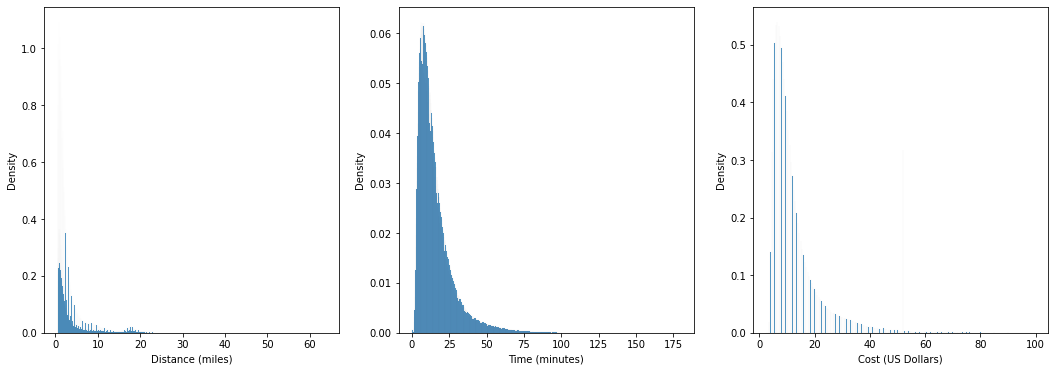

In [37]:
figure(figsize=(18, 6))
subplot(1, 3, 1)
histplot(data=trips_clean, x='D', stat='density')
xlabel("Distance (miles)")
subplot(1, 3, 2)
histplot(data=trips_clean, x='T', stat='density')
xlabel("Time (minutes)")
subplot(1, 3, 3)
histplot(data=trips_clean, x='C', stat='density')
xlabel("Cost (US Dollars)")
pass

### Exercise 6: `part_of_day` (2 points) ###

A natural question is whether trip distance, time, and cost vary with the time of day. To help check, complete the function, `part_of_day(tss)`, below.

The input `tss` is a pandas `Series` containing datetime objects, just like `trips_clean['T_start']` or `trips_clean['T_end']`.

Your function should determine the **hour**, as an integer between 0-23 inclusive, corresponding to a 24-hour clock. _Hint:_ Per Exercise 3, recall that a datetime `Series` `s` has an accessor `s.dt`; the attribute `s.dt.hour` will return the hour as a value in the interval [0, 23]; see [this link](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.hour.html) if you need details.

Your function should then return a new pandas `Series` object with hour ranges converted to strings as follows:

- Hours 0-5 inclusive => `'wee hours'`
- Hours 6-11 inclusive => `'morning'`
- Hours 12-17 inclusive => `'afternoon'`
- Hours 18-23 inclusive => `'evening'`

_Example._ Suppose `tss` is the `Series` object,
```
23       2019-06-01 00:30:42
39781    2019-06-01 06:42:38
164505   2019-06-01 17:40:07
404098   2019-06-02 18:35:08
Name: T_start, dtype: datetime64[ns]
```
_(The leftmost column of this example shows hypothetical index values.)_ Observe that the hours are 0, 6, 17, and 18. Therefore, your function would return a `Series` with these values:
```
23        wee hours
39781       morning
164505    afternoon
404098      evening
Name: T_start, dtype: object
```

> _Note:_ Your `Series` should have the same index as the input `tss`, as suggested by the example above.

In [38]:
def part_of_day(tss):
    ###
    segments = tss.dt.hour // 6 # Divide 24-hour day into 4 segments
    pod = segments.map({0: 'wee hours',
                        1: 'morning',
                        2: 'afternoon',
                        3: 'evening'}) # remap to descriptions
    return pod
    ###


In [39]:
# Demo:
print("* Sample input `Series`:")
ex6_demo = trips_clean['T_start'].iloc[[20, 37752, 155816, 382741]]
display(ex6_demo)

print("\n* Your output:")
part_of_day(ex6_demo)

* Sample input `Series`:


23       2019-06-01 00:30:42
39781    2019-06-01 06:42:38
164505   2019-06-01 17:40:07
404098   2019-06-02 18:35:08
Name: T_start, dtype: datetime64[ns]


* Your output:


23        wee hours
39781       morning
164505    afternoon
404098      evening
Name: T_start, dtype: object

In [40]:
# Test cell: mt2_ex6_part_of_day (2 points)

###
### AUTOGRADER TEST - DO NOT REMOVE
###

from testing_tools import mt2_ex6__check
print("Testing...")
for trial in range(100):
    mt2_ex6__check(part_of_day)

part_of_day__passed = True
print("\n(Passed!)")

Testing...

(Passed!)


### Sample results for Exercise 6: `part_of_day` $\implies$ `trips_pod` ###

If you had a working solution to Exercise 6, then in principle you could apply it to the `trips_clean` data to determine the part of the day in which each ride starts. We have precomputed these values for you.

The code cell below loads that result into the global object `trips_pod` and runs a simple aggregation query to summarize the median distances, costs, and trip times by part-of-day.

> **Read and run this cell even if you skipped or otherwise did not complete Exercise 6.**

In [41]:
from testing_tools import mt2_parts_of_day as pod

trips_pod = trips_clean.copy()
trips_pod['P'] = pod
trips_pod[['P', 'D', 'C', 'T']].groupby('P').agg('median')

,D,C,T
P,,,
afternoon,1.63,10.0,13.333333
evening,1.86,10.0,11.833333
morning,1.63,9.5,11.750000
wee hours,2.30,10.0,10.500000


Perhaps unsurprisingly, people tend to travel longer distances in the "wee hours," but it takes less time to do so (presumably due to less traffic).

## Part F: Path finding (Exercise 7, the last exercise) ##

For the last exercise, we'll see if we can identify potential paths through the city that are cheaper or faster than we might otherwise have guessed.

By analogy, when you are shopping for flights, you might sometimes find that a route through a particular city (e.g., New York to Houston to Los Angeles) is cheaper than flying directly from New York to Los Angeles. Are there such _potential_ routes in the taxi dataset?

**Direct "routes."** The taxi dataset itself contains "direct routes" between pairs of zones.

To start, for each pair of zones, let's calculate the median trip cost.

In [42]:
pair_costs = trips_clean[['I', 'J', 'C']].groupby(['I', 'J']).median().reset_index()
pair_costs.head()

,I,J,C
0,1,1,89.0
1,1,158,30.0
2,1,161,8.5
3,1,162,55.0
4,1,163,75.0


In the sample output above, the columns `'I'` and `'J'` are the starting and ending zones, and `C` is the median (dollar) cost to travel from zone `'I'` to zone `'J'`. Here are the most expensive zone-to-zone trips:

In [43]:
pair_costs.sort_values(by='C', ascending=False).head()

,I,J,C
8321,83,1,99.0
3256,39,244,99.0
2938,37,1,98.5
15997,151,86,98.0
2180,28,1,97.5


For the path analysis, we'll need to convert `pair_costs` into a sparse matrix representation. That is your next (and final) task.

### Exercise 7: `make_csr` (2 points) ###

Complete the function, `make_csr(pair_costs, n)`, below. It should take as input a pair-costs dataframe, like the one shown above, as well as the matrix dimension, `n`.

It should return a Scipy sparse matrix in CSR (compressed sparse row) format. For the nonzero coordinates, use the zone IDs, `pair_costs['I']` and `pair_costs['J']` _as-is_. For the nonzero values, use the cost, `pair_costs['C']`.

_Example:_ Suppose `pair_costs` is the following:

|   I |   J |   C |
|----:|----:|----:|
|   1 |   1 |  89 |
|   3 |   3 |  10 |
|   4 |   1 |  70 |
|   4 |   3 |  46 |
|   4 |   4 |   5 |

The matrix dimension must be `n >= 5`; suppose we take it to be `n=5`. Then the corresponding sparse matrix is, logically, as follows (blanks are zeroes):

|   | 0    | 1    | 2 | 3    | 4    |
|:-:|:----:|:----:|:-:|:----:|:----:|
| 0 |      |      |   |      |      |
| 1 |      | 89.0 |   |      |      |
| 2 |      |      |   |      |      |
| 3 |      |      |   | 10.0 |      |
| 4 |      | 70.0 |   | 46.0 | 5.0  |

You need to construct this matrix and store it as a Scipy CSR sparse matrix object.

> _Note:_ Assume coordinates start at 0 and end at `n-1`, inclusive. If any zones IDs are missing, which may have happened during our filtering, those will simply become zero rows and columns in the matrix, as shown in the above example where there are no coordinates for row/column 0 or row/column 2.

In [44]:
def make_csr(pair_costs, n):
    ###
    from scipy.sparse import csr_matrix
    I = pair_costs['I']
    J = pair_costs['J']
    V = pair_costs['C']
    G = csr_matrix((V, (I, J)), shape=(n, n))
    return G
    ###


,I,J,C
0,1,1,89.0
19,3,3,10.0
71,4,1,70.0
72,4,3,46.0
73,4,4,5.0


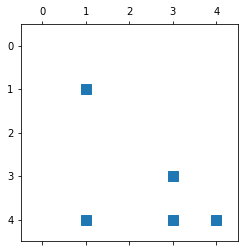

In [45]:
# Demo:
ex7_demo = pair_costs[(pair_costs['I'] <= 4) & (pair_costs['J'] <= 4)]
display(ex7_demo)

# Call your code to convert:
ex7_csr = make_csr(ex7_demo, 5)
assert isinstance(ex7_csr, sp.sparse.csr.csr_matrix), "Not a Scipy CSR sparse matrix?"

# Try to visualize:
from matplotlib.pyplot import spy
spy(ex7_csr);

In [46]:
# Test cell: mt2_ex7_make_csr (2 points)

###
### AUTOGRADER TEST - DO NOT REMOVE
###

from testing_tools import mt2_ex7__check
print("Testing...")
for trial in range(100):
    mt2_ex7__check(make_csr)

make_csr__passed = True
print("\n(Passed!)")

Testing...

(Passed!)


### Sample results for Exercise 7: `make_csr` $\implies$ `Cost_matrix` ###

If you had a working solution to Exercise 7, then in principle you could apply it to the `pair_costs` data to construct a CSR sparse matrix. We have precomputed this matrix for you.

The code cell below loads that result into the global object `Cost_matrix`.

> **Read and run this cell even if you skipped or otherwise did not complete Exercise 7.**

The precomputed `Cost_matrix` is 266 x 266.
It has 29,048 nonzeros, which makes it about 41.1% sparse.


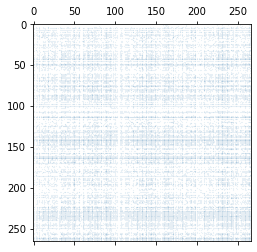

In [47]:
from testing_tools import mt2_csr_matrix as Cost_matrix

print(f"The precomputed `Cost_matrix` is {Cost_matrix.shape[0]:,} x {Cost_matrix.shape[1]:,}.")
print(f"It has {Cost_matrix.nnz:,} nonzeros, which makes it about {Cost_matrix.nnz/Cost_matrix.shape[0]/Cost_matrix.shape[1]*100:.1f}% sparse.")

spy(Cost_matrix, markersize=0.02); # Quick viz

## Fin! And a visual epilogue ##

Congrats, you’ve reached the end of this exam problem. Don’t forget to restart and run all cells again to make sure it’s all working when run in sequence; and make sure your work passes the submission process. Good luck!

**Epilogue.** If you have some time to spare, the rest of this notebook shows you how to use the infrastructure you just built to do an interesting analysis, namely, looking for indirect paths between locations that might be _cheaper_ than going "directly" between those locations.

This analysis relies on a standard Python module for graph analysis called [NetworkX](https://networkx.org/). Recall that a sparse matrix can be interpreted as a weighted graph of interconnected vertices, where we can assign a cost or _weight_ to each edge that directly connects two vertices. Let's start by constructing this graph.

In [48]:
from networkx import from_scipy_sparse_matrix

Cost_graph = from_scipy_sparse_matrix(Cost_matrix)

The _weight_ of every edge of this graph is the value of the corresponding entry of the sparse matrix. For instance:

In [49]:
print("Matrix entry (83, 1):", Cost_matrix[83, 1])
print("Graph edge (83, 1):", Cost_graph[83][1]['weight'])

Matrix entry (83, 1): 99.0
Graph edge (83, 1): 99.0


**Shortest paths.** One cool aspect of the NetworkX graph representation is that we can perform graph queries. For example, here is a function that will look for the shortest path---that is, the sequence of vertices such that traversing their edges yields a path whose total weight is the smallest among all possible paths. Indeed, that path can be _smaller_ than the direct path, as you'll see momentarily!

The function `get_shortest_path(G, i, j)` finds the shortest path in the graph `G` going between `i` and `j`, and returns the path as a list of vertices along with the length of that path:

In [50]:
def get_shortest_path(G, i, j):
    from networkx import shortest_path, shortest_path_length
    p = shortest_path(G, source=i, target=j, weight='weight')
    l = shortest_path_length(G, source=i, target=j, weight='weight')
    return p, l

# Demo: Check out the shortest path between 83 and 1
path_83_1, length_83_1 = get_shortest_path(Cost_graph, 83, 1)
print("Path:", path_83_1)
print("Length", length_83_1, "via the above path vs.", Cost_matrix[83, 1], '("direct")')

Path: [83, 233, 156, 1]
Length 69.5 via the above path vs. 99.0 ("direct")


In the example above, the path starting at 83 and going through 233 and 156 before arriving at 1 has a cost of 69.5. Compare that to the direct path cost of 99!

Here is a visual representation of that path (run the next two cells).

In [51]:
shapes = load_geopandas('nyc-taxi-data/zone-shapes/geo_export_28967859-3b38-43de-a1a2-26aee980d05c.shp')
shapes['location_i'] = shapes['location_i'].astype(int)

Opening geopandas data file, './resource/asnlib/publicdata/nyc-taxi-data/zone-shapes/geo_export_28967859-3b38-43de-a1a2-26aee980d05c.shp' ...


['83. Elmhurst/Maspeth, Queens',
 '233. UN/Turtle Bay South, Manhattan',
 '156. Mariners Harbor, Staten Island',
 '1. Newark Airport, EWR']
==> Cost is 69.5 compared to the direct cost of 99.0


[83, 233, 156, 1]

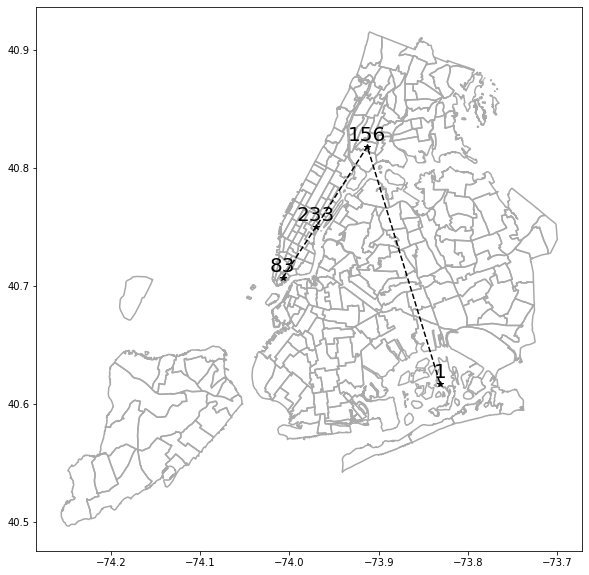

In [52]:
from testing_tools import plot_path

demo_i, demo_j = 83, 1
demo_path, demo_length = get_shortest_path(Cost_graph, demo_i, demo_j)
pprint(path_to_zones(demo_path, zones_dict))
print(f"==> Cost is {demo_length} compared to the direct cost of {Cost_graph[demo_i][demo_j]['weight']}")
plot_path(demo_path, shapes)

This example is just a teaser; we hope you'll find some time to explore examples like this one in your own projects.